# Life Expectancy and GDP #
    - This dataset provides a snapshot of the relationship between life expectancy at birth and Gross Domestic Product (GDP) for different countries - Chile, China, Germany, Mexico, USA, Zimbabwe - spanning the years from 2000 to 2015. It presents a unique opportunity to analyze and compare how these key indicators of societal well-being and economic health have evolved over time across a diverse set of nations.

## Explore and analyse:
    - Has life expectancy increased over time in the six nations?
    - Has GDP increased over time in the six nations?
    - Is there a correlation between GDP and life expectancy of a country?
    - What is the average life expectancy in these nations?
    - What is the distribution of that life expectancy?
    - GDP and Life Expectancy Change: Analyze the yearly change in GDP and life expectancy for each country. 



In [64]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [65]:
# Load the data
df = pd.read_csv('/CodeAcademy/Portfolio/Codecademy-Data-Science-Portfolio/data_files/life_expectancy_gdp.csv')

In [66]:
# Display the first few rows of the DataFrame
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [67]:
# Information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [68]:
# Renaming the 'Life expectancy at birth (years)' column to 'Life Expectancy' for easier reference
df = df.rename(columns={'Life expectancy at birth (years)': 'Life Expectancy'})

In [69]:
# Summary statistics of the DataFrame
df.describe(include='all')

,Country,Year,Life Expectancy,GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


### Analyse data:

- Has life expectancy increased over time in the six nations?

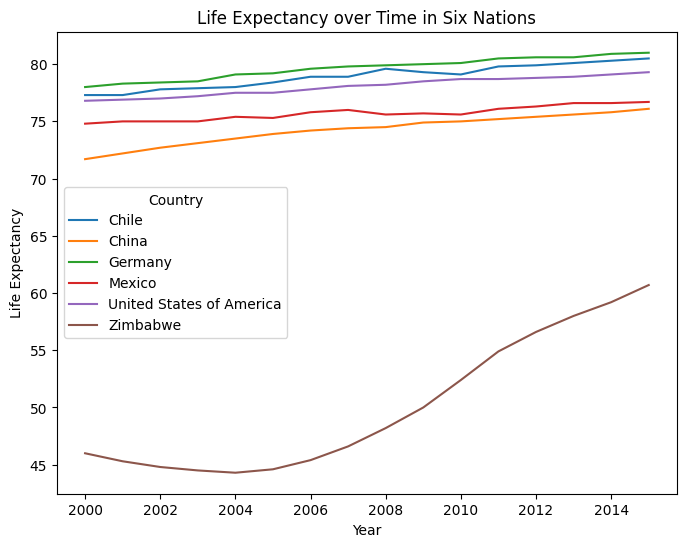

<Figure size 640x480 with 0 Axes>

In [70]:
# Plotting Life Expectancy over time for all countries
plt.figure(figsize = (8,6))
sns.lineplot(data=df, x='Year', y='Life Expectancy', hue='Country')
plt.title('Life Expectancy over Time in Six Nations')
plt.show()
plt.clf()

Life expectancy has generally increased mostly every year. Zimbabwe started to rise after 2004, perhaps due to programs to improve the quality of life.


- Has GDP increased over time in the six nations?

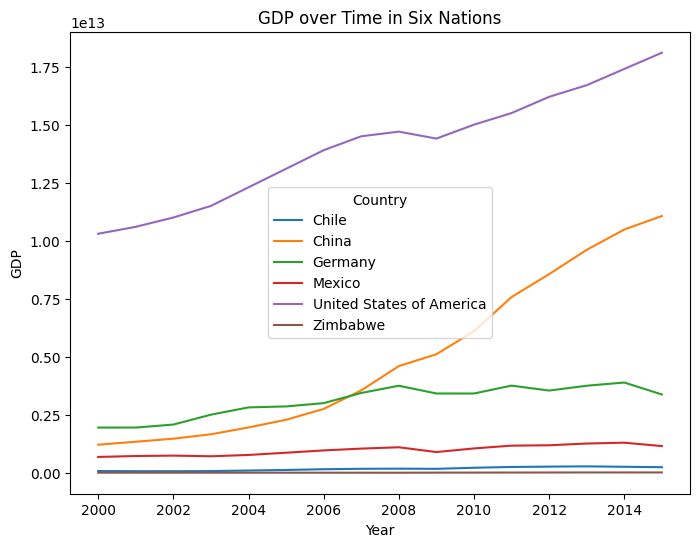

<Figure size 640x480 with 0 Axes>

In [71]:
# Plotting GDP over time for all countries
plt.figure(figsize = (8,6))
sns.lineplot(data=df, x='Year', y='GDP', hue='Country')
plt.title('GDP over Time in Six Nations')
plt.show()
plt.clf()

GDP is growing steadily in the US and China, in Germany, growth stopped in 2008 and held on to 2015 with slight fluctuations and began to fall. In the rest of the countries, GDP is at a low level and practically unchanged during all the years of observations.

- Is there a correlation between GDP and life expectancy of a country?

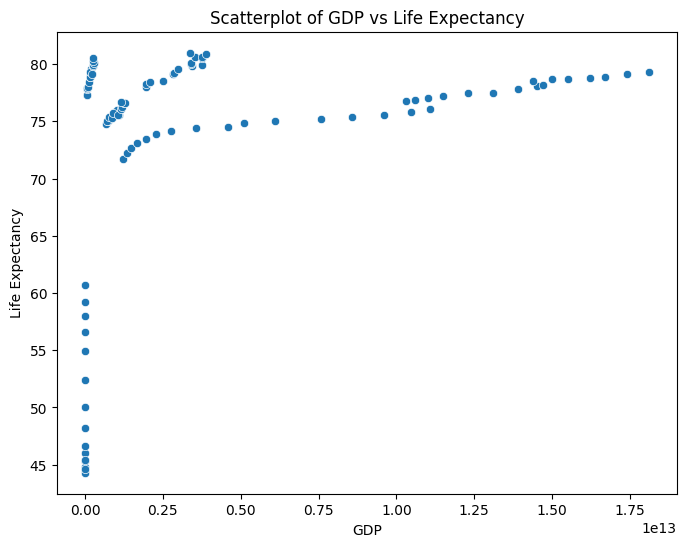

<Figure size 640x480 with 0 Axes>

In [72]:
# Scatterplot of GDP vs Life Expectancy
plt.figure(figsize = (8,6))
sns.scatterplot(data=df, x='GDP', y='Life Expectancy')
plt.title('Scatterplot of GDP vs Life Expectancy')
plt.show()
plt.clf()

In [73]:
# Calculating the correlation between GDP and Life Expectancy
correlation = df['GDP'].corr(df['Life Expectancy'])
print(correlation)

0.3432067484491559


There is some relationship between a country's GDP and life expectancy: countries with higher GDP tend to have higher life expectancy. However, this relationship is not strong and there are many other factors that can influence life expectancy.

- What is the average life expectancy in these nations?

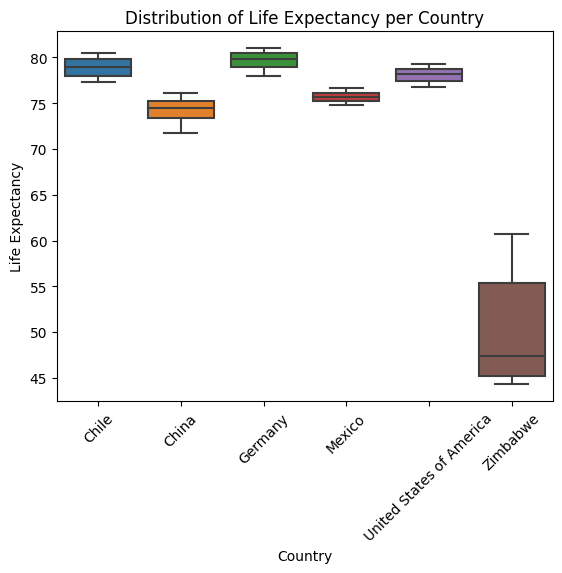

In [74]:
# Boxplot of Life Expectancy per Country
sns.boxplot(x='Country', y='Life Expectancy', data=df)
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.title('Distribution of Life Expectancy per Country')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

The average duration in Chile, Germany, Mexico and the United States is 75 to 79 years with little variation. In China it is 74 years, but the variation is larger. Zimbabwe stands out strongly, with an average duration of 48 years but with outliers ranging from 45 to 62 years.


- What is the distribution of that life expectancy?

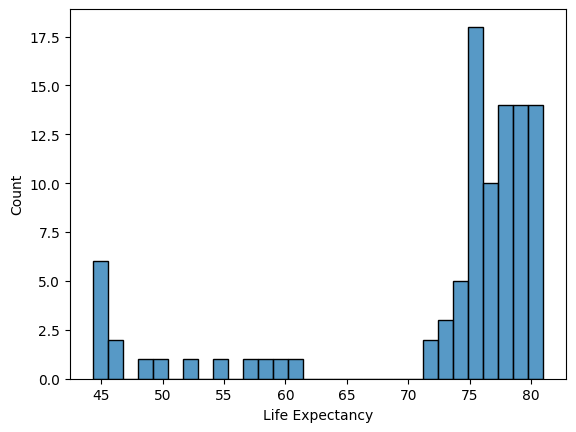

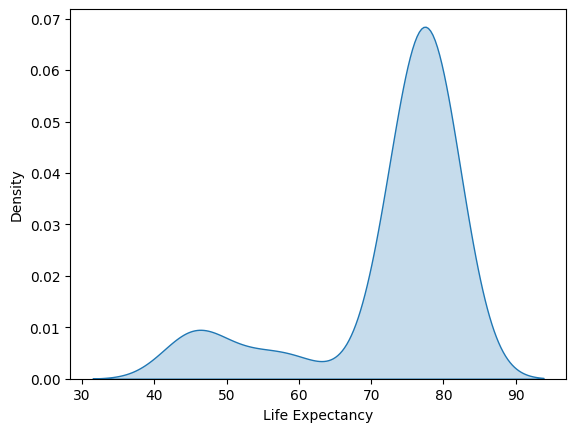

In [75]:
# Histogram and KDE plot of Life Expectancy
sns.histplot(data = df, x = 'Life Expectancy', bins = 30, kde=False)
plt.show()
sns.kdeplot(data = df, x = 'Life Expectancy', fill = True)
plt.show()

The histogram and KDE plot show a bimodal distribution of life expectancy, largely due to the significantly lower life expectancy in Zimbabwe compared to the other countries.

- GDP and Life Expectancy Change: Analyze the yearly change in GDP and life expectancy for each country. 

In [76]:
# Calculating yearly change in GDP and Life Expectancy
df['GDP Change'] = df.groupby('Country')['GDP'].diff()
df['Life Exp Change'] = df.groupby('Country')['Life Expectancy'].diff()

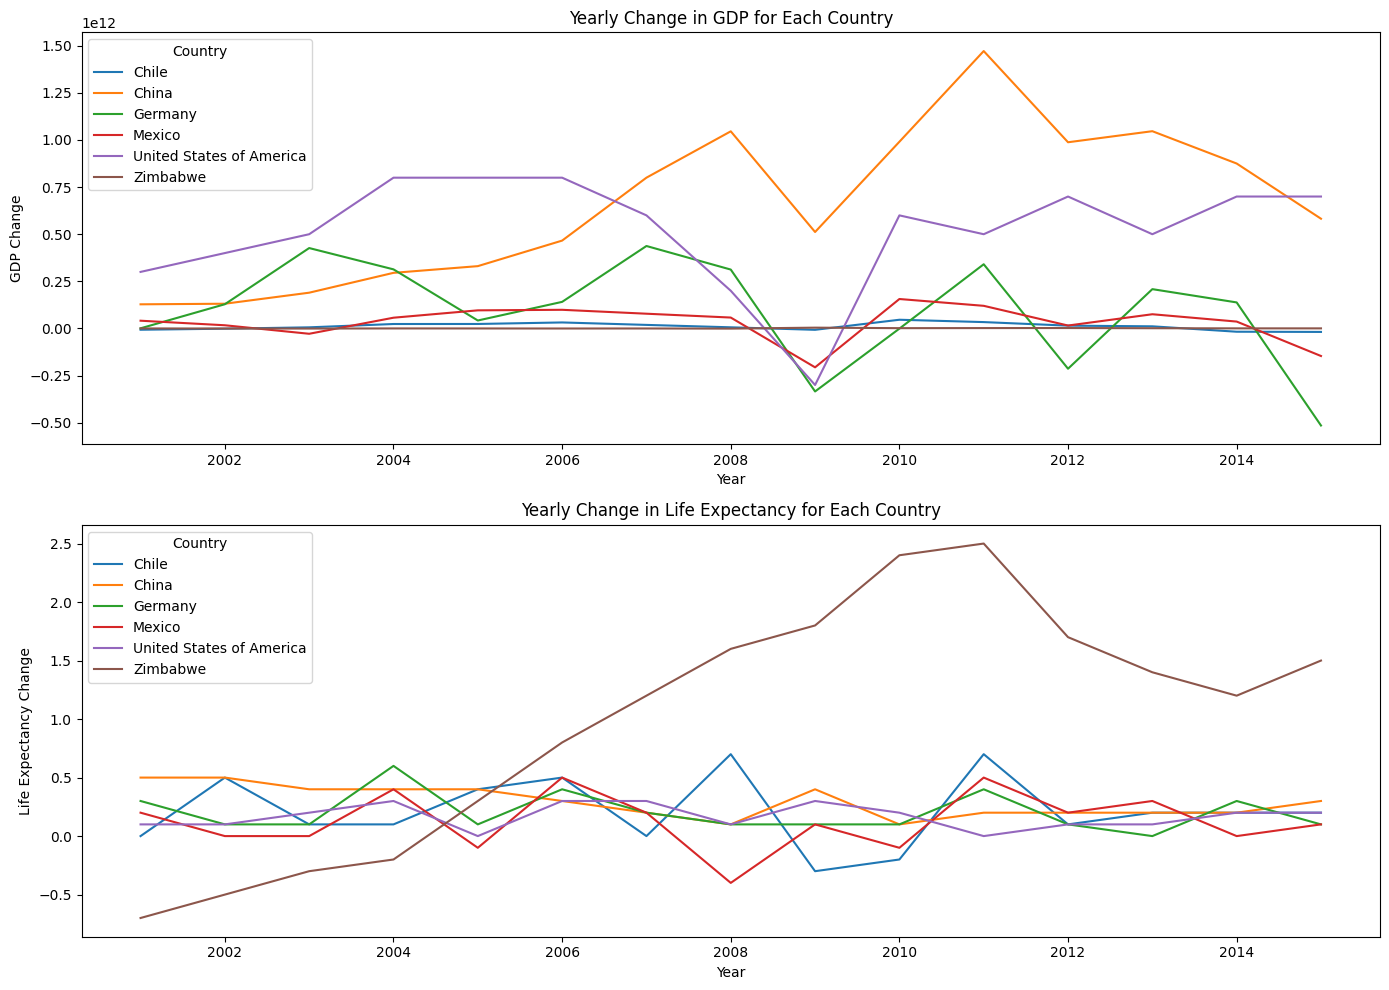

In [77]:
plt.figure(figsize=(14,10))

# Plotting the yearly change in GDP for each country
plt.subplot(2, 1, 1)
sns.lineplot(data=df, x='Year', y='GDP Change', hue='Country')
plt.title('Yearly Change in GDP for Each Country')
plt.ylabel('GDP Change')

# Plotting the yearly change in life expectancy for each country
plt.subplot(2, 1, 2)
sns.lineplot(data=df, x='Year', y='Life Exp Change', hue='Country')
plt.title('Yearly Change in Life Expectancy for Each Country')
plt.ylabel('Life Expectancy Change')

plt.tight_layout()
plt.show()

The plots show various trends in the yearly change of GDP and life expectancy among the six nations. Most notably, Zimbabwe shows a dramatic improvement in life expectancy over the period.

Annual change in GDP: Zimbabwe and Chile - virtually no change over time. The rest of the countries had a strong decline in 2009 (after the economic crisis). After China (which has the largest values of changes per year), Germany and Mexico, there was an increase in GDP for 2-3 years, in the last year - a fall. Only the United States stands out, which, judging by the observations, got out of the crisis and managed to keep GDP at a level almost pre-crisis.

According to the annual measurement of life expectancy - during the observation period, the values practically do not change in all countries, plus or minus half a year of change per year. With the exception of Zimbabwe since 2004, annual changes have been positive from 0.5 to 2.5 years per year.




### Conclusion:

- This analysis provided insights into the dynamics of life expectancy and GDP in six diverse nations from 2000 to 2015. 
- While there is a positive correlation between a country's GDP and life expectancy, the relationship is not very strong, indicating that other factors also significantly impact life expectancy. 
- Over the years, most nations have seen an increase in both GDP and life expectancy, albeit to varying degrees. Zimbabwe stands out with a dramatic rise in life expectancy, despite a relatively steady GDP. 
- The distribution of life expectancy reveals a stark contrast between Zimbabwe and the other five nations, which may be due to various socio-economic factors unique to Zimbabwe.